In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "../data/raw/bootstrapping_mutspecs/"

In [7]:
filepaths = sorted(os.listdir(path))

In [11]:
dataframes = []
for f in filepaths:
    if f.endswith(".csv"):
        _path = os.path.join(path, f)
        _df = pd.read_csv(_path, index_col=0)
        dataframes.append(_df)

In [16]:
full_df = pd.concat(dataframes, ignore_index=True)
full_df

,NucSubst,ExpFr,ObsFr,ObstoExp,MutSpec
0,A>C,8954,29641,3.310364,0.014297
1,A>G,8954,138486,15.466384,0.066796
2,A>U,8954,23761,2.653674,0.011461
3,C>A,5492,27598,5.025127,0.021702
4,C>G,5492,14329,2.609068,0.011268
...,...,...,...,...,...
11995,G>C,5863,13880,2.367389,0.010220
11996,G>U,5863,161068,27.471943,0.118599
11997,U>A,9594,21613,2.252762,0.009725
11998,U>C,9594,458894,47.831353,0.206493


In [22]:
full_df.groupby("NucSubst").ObsFr.describe()

,count,mean,std,min,25%,50%,75%,max
NucSubst,,,,,,,,
A>C,1000.0,29394.601,168.540065,28858.0,29279.75,29397.5,29505.00,30053.0
A>G,1000.0,138362.198,348.961171,136976.0,138134.25,138366.0,138599.00,139291.0
A>U,1000.0,23663.958,157.207979,23126.0,23565.00,23669.5,23767.00,24267.0
C>A,1000.0,27921.633,166.348454,27329.0,27809.75,27913.0,28034.25,28517.0
C>G,1000.0,14225.175,117.542940,13868.0,14146.00,14225.0,14303.25,14685.0
C>U,1000.0,459310.067,570.795445,457400.0,458941.75,459311.0,459678.75,461217.0
G>A,1000.0,148354.749,365.099602,147018.0,148107.75,148349.5,148594.75,149738.0
G>C,1000.0,13758.813,114.952242,13401.0,13681.00,13758.0,13839.00,14094.0
G>U,1000.0,160664.116,384.930482,159346.0,160406.50,160672.0,160936.25,161869.0


<AxesSubplot:xlabel='NucSubst', ylabel='MutSpec'>

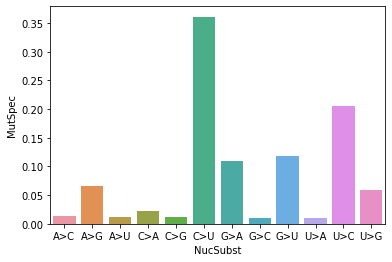

In [29]:
sns.barplot(x="NucSubst", y="MutSpec", data=full_df, ci=95)

In [34]:
base_path = "https://cog.sanger.ac.uk/cosmic-signatures-production/documents/COSMIC_v{}_SBS_{}.txt"
genomes = ["GRCh37", "GRCh38", "mm9", "mm10"]
version = "3"

cosmic = []
for g in genomes:
    _df = pd.read_csv(base_path.format(version, g), sep="\t")
    cols = _df.columns
    new_cols = []
    for c in cols:
        if c.startswith("SBS"):
            c = c + "_" + g
        new_cols.append(c)
    _df.columns = new_cols
    cosmic.append(_df)

In [35]:
from functools import partial, reduce

sbs = reduce(partial(pd.merge, on="Type"), cosmic)

In [36]:
sbs[["Type"] + [c for c in sbs.columns if "18" in c]]

,Type,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,A[C>A]A,0.051534,0.051688,0.058210,0.058209
1,A[C>A]C,0.015810,0.015617,0.016001,0.016001
2,A[C>A]G,0.002432,0.002505,0.002200,0.002200
3,A[C>A]T,0.021414,0.021469,0.021509,0.021510
4,A[C>G]A,0.001731,0.001736,0.001955,0.001955
...,...,...,...,...,...
91,T[T>C]T,0.003372,0.003377,0.002886,0.002886
92,T[T>G]A,0.000696,0.000686,0.000624,0.000624
93,T[T>G]C,0.002101,0.002136,0.002156,0.002157
94,T[T>G]G,0.001451,0.001458,0.001423,0.001423


In [38]:
_path = "https://raw.githubusercontent.com/tomsasani/bxd_mutator_manuscript/471c88d47e2677b3cb22dac142afd52ea6edb81b/data/sigProfiler_SBS_signatures_SBS18.csv"
their_sbs = pd.read_csv(_path)
their_sbs.head()

,Type,Subtype,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,C>A,ACA,0.051534,0.051381,0.045303,0.045188
1,C>A,ACC,0.015810,0.016005,0.015500,0.015478
2,C>A,ACG,0.002432,0.002361,0.002663,0.002682
3,C>A,ACT,0.021414,0.021356,0.021160,0.021113
4,C>G,ACA,0.001731,0.001726,0.001522,0.001518


In [47]:
tcols = "SBS18_GRCh37	SBS18_GRCh38	SBS18_mm9	SBS18_mm10".split()
(their_sbs[tcols] - sbs[tcols]).abs().sum(axis=0)

SBS18_GRCh37    1.006140e-16
SBS18_GRCh38    1.248973e-02
SBS18_mm9       1.297250e-01
SBS18_mm10      1.307704e-01
dtype: float64

In [46]:
their_sbs[tcols] - sbs[tcols]

,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,0.0,-0.000307,-0.012907,-0.013021
1,0.0,0.000388,-0.000501,-0.000523
2,0.0,-0.000144,0.000463,0.000482
3,0.0,-0.000113,-0.000349,-0.000396
4,0.0,-0.000010,-0.000434,-0.000437
...,...,...,...,...
91,0.0,-0.000009,0.001025,0.000992
92,0.0,0.000021,0.000147,0.000144
93,0.0,-0.000069,-0.000123,-0.000134
94,0.0,-0.000015,0.000046,0.000038


In [44]:
their_sbs[tcols]

,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,0.051534,0.051381,0.045303,0.045188
1,0.015810,0.016005,0.015500,0.015478
2,0.002432,0.002361,0.002663,0.002682
3,0.021414,0.021356,0.021160,0.021113
4,0.001731,0.001726,0.001522,0.001518
...,...,...,...,...
91,0.003372,0.003368,0.003911,0.003878
92,0.000696,0.000707,0.000771,0.000768
93,0.002101,0.002067,0.002033,0.002023
94,0.001451,0.001444,0.001469,0.001460


In [45]:
sbs[tcols]

,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,0.051534,0.051688,0.058210,0.058209
1,0.015810,0.015617,0.016001,0.016001
2,0.002432,0.002505,0.002200,0.002200
3,0.021414,0.021469,0.021509,0.021510
4,0.001731,0.001736,0.001955,0.001955
...,...,...,...,...
91,0.003372,0.003377,0.002886,0.002886
92,0.000696,0.000686,0.000624,0.000624
93,0.002101,0.002136,0.002156,0.002157
94,0.001451,0.001458,0.001423,0.001423
